In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
d1=pd.read_excel('car24.xlsx', index_col=0)
d2=pd.read_excel('cardekho.xlsx', index_col=0)


In [12]:
d1.columns

Index(['Name', 'Manufacture', 'Model', 'Fuel', 'Driven', 'Automatic', 'Owner',
       'Location', 'Posting Date', 'Price'],
      dtype='object')

In [13]:
d1.drop('Posting Date',axis=1,inplace=True)

In [14]:
d2.drop('Posting Date',axis=1,inplace=True)

In [15]:
d1.shape ,d2.shape

((60, 9), (500, 9))

In [16]:
d2.isnull().sum()

Name            0
Manufacture     0
Model          20
Fuel            0
Driven          0
Automatic       0
Owner           0
Location        0
Price           0
dtype: int64

In [17]:
d2.replace('-',np.nan, inplace=True)

In [18]:
d2.isnull().sum()

Name           40
Manufacture    40
Model          60
Fuel           40
Driven         40
Automatic      40
Owner          40
Location       40
Price          40
dtype: int64

In [19]:
d2.dropna(inplace=True)

In [20]:
d1.head(5)

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,"80,631 km",Manual,1st Owner,HR-26,"₹ 9,81,699"
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,"12,981 km",Manual,2nd Owner,HR-26,"₹ 11,55,299"
2,Renault Kwid,2016,RXT,Petrol,"22,388 km",Manual,1st Owner,DL-1C,"₹ 2,79,799"
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,"36,806 km",Automatic,1st Owner,UP-16,"₹ 21,33,299"
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,"21,784 km",Automatic,2nd Owner,HR-26,"₹ 14,29,999"


In [21]:
d1['Location'].unique()

array(['HR-26', 'DL-1C', 'UP-16', 'DL-6C', 'DL-8C', 'DL-7C', 'UP-37',
       'UP-14', 'HR-79', 'DL-10', 'DL-3C', 'DL-9C', 'DL-5C', 'DL-2C',
       'DL-4C', 'HR-51', 'HR-29', 'HR-98', 'DL-12', 'HR-55'], dtype=object)

In [22]:
d1['Location']=d1['Location'].str.split('-').str.slice(0,1).str.join(' ')

In [23]:
d2.head(5)

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Maruti Suzuki Swift,2021,VXI,PETROL,51000.0 KM,MANUAL,1st,"Ellis Nagar, Madurai","₹ 6,90,000"
1,Renault Duster,2015,85PS Diesel RxE,DIESEL,74253.0 KM,MANUAL,2nd,"Mayur Vihar, Delhi","₹ 4,75,000"
2,Maruti Suzuki Celerio,2015,VXI AMT,PETROL,36213.0 KM,MANUAL,2nd,"Kapsi MIDC, Nagpur","₹ 4,00,000"
4,Ford Figo,2013,2012-2015 Diesel EXI,DIESEL,70000 KM,MANUAL,Second,"Sajjan Bilas Evergreen Society, Bhilwara","₹ 2,00,000"
5,Maruti Suzuki Swift,2009,VDI,DIESEL,"135,000 KM",MANUAL,4+,"Ranna Circle, Mudhol","₹ 2,60,000"


In [24]:
d2['Location']=d2['Location'].str.split(',').str.slice(1,2).str.join(' ')

In [25]:
d2['Location']=d2['Location'].str.strip()

In [26]:
d2['Location'].unique()

array(['Madurai', 'Delhi', 'Nagpur', 'Bhilwara', 'Mudhol', 'Thrissur',
       'Chirmiri', 'Tiruppur', 'Karnal', 'Gunupur', 'Sagar', 'Srinagar',
       'Malappuram', 'Jorhat', 'Mavelikkara', 'Nashik', 'Ara',
       'Muzaffarnagar', 'Coimbatore', 'Hyderabad', 'Lucknow', 'Salem',
       'Kochi', 'Chennai', 'Ahmedabad', 'Surat', 'Jaipur', 'Kolhapur',
       'Chandigarh', 'Mumbai', 'Patiala', 'Ghaziabad', 'Bengaluru',
       'Bobbili', 'Vijayawada', 'Herbertpur', 'Gorakhpur', 'Palakkodu',
       'Thiruvallur', 'Barnala', 'Pali Lalitpur District', 'Kakinada',
       'Kancheepuram', 'Jambusar', 'Khanna', 'Kottayam', 'Gwalior',
       'SIDCUL Haridwar', 'Vadodara', 'Guntur', 'Idukki Township',
       'Ballia', 'Islampur', 'Pune', 'Rajapalayam', 'Bathinda',
       'Senapati', 'Adoor', 'Manjeri', 'Varanasi', 'Tikari',
       'Mannarkad I', 'Udaipur', 'Noida', 'Thiruvananthapuram',
       'Kotputli', 'Kondotty', 'Guwahati', 'Perumbavoor', 'Kushinagar',
       'Bhubaneshwar', 'Gurgaon', 'Hisar', '

In [27]:
dic={"Madurai":'TN',"Delhi":'DL',"Nagpur":'MH',"Bhilwara":'RJ',"Mudhol":'KR',"Thrissur":'KE',"Chirmiri":'CH',"Tiruppur":'TN',
"Karnal":'HR',"Gunupur":'OD',"Sagar":'MP',"Srinagar":'JK',"Malappuram":'KE',"Jorhat":'AS',"Mavelikkara":'KE',
"Nashik":'MH',"Ara":'BI',"Muzaffarnagar":'UP',"Coimbatore":'TN',"Hyderabad":'HY',
"Lucknow":'UP',"Salem":'TN',"Kochi":'KE','Chennai':'TN',"Ahmedabad":'GU',"Surat":'GU',
"Jaipur":'RJ',"Kolhapur":'MH',"Chandigarh":'PJ',"Mumbai":'MH',"Patiala":'PJ',
"Ghaziabad":'UP',"Bengaluru":'KR',"Bobbili":'AP',"Vijayawada":'AP',
"Herbertpur":'UK',"Gorakhpur":'UP',"Palakkodu":'TN',"Thiruvallur":'TN',
"Barnala":'PJ',"Pali Lalitpur District":'UP',"Kakinada":'AP',
"Kancheepuram":'TN',"Jambusar":'GU',"Khanna":'PJ',"Kottayam":'KE',"Gwalior":'MP',
"SIDCUL Haridwar":'UK',"Vadodara":'GU',"Guntur":'AP',"Idukki Township":'KE',
"Ballia":'UP',"Islampur":'WB',"Pune":'MH',"Rajapalayam":'TN',"Bathinda":'PJ',
"Senapati":'MA',"Adoor":'KE',"Manjeri":'KE',"Varanasi":'UP',"Tikari":'BI',
"Mannarkad I":'KE',"Udaipur":'RJ',"Noida":'UP',"Thiruvananthapuram":'KE',
"Kotputli":'RJ',"Kondotty":'KE',"Guwahati":'AS',"Perumbavoor":'KE',"Kushinagar":'UP',
"Bhubaneshwar":'OD',"Gurgaon":'HR',"Hisar":'HR',"Satna":'MP',"Sonipat":'HR',
"Nakkapalle":'AP',"Sangli Miraj Kupwad":'MP',"Kota":'RJ',"Tirupati":'AP',
"Rayadurg":'AP',"Ratu":'JH',"Greater Noida":'UP',"Khanauri":'PJ',"Muvattupuzha":'KE',
"Neem Ka Thana":'RJ',"Nizambad":'TE',"Ludhiana":'PJ',"Thane":'MH',"Bareilly":'UP',
"Panipat":'HR',"Virajpete":'KR',"Mangaldoi":'AS',"Narnaul":'HR',"Rajkot":'Gu',
"Fazi Nagar":'UP',"Palakkad":'KE',"Sitamarhi":'BI',"Dhanaula":'PJ',"Thalassery":'KE',
"Jhansi":'UP',"Durgapur":'WB',"Kolkata":'WB',"Tuticorin":'TN',"Maralia":'OD',"Rohtak":'HR',
"Rajahmundry":'AP',"Banda":'UP',"Pileru":'AP',"Erode":'TN',"Edavilangu":'KE',"Indore":'MP',
"Tiruchirappalli":'TN',"Kashipur":'UK',"Jahanabad":'BI',"Gharsana":'RJ',
"Dhariwal":'PJ',"Navi Mumbai":'MH',"Kurnool":'AP',"Thanjavur":'TN',"Dehradun":'UK',
"Ramnagar":'UK',"Uttar Champamura":'TI',"Kudal MIDC":'MH',"Mettupalayam":'TN',
"Pollachi":'TN',"Pataudi":'HR',"Malaut":'PJ',"Shivamogga":'KR',"Mairwa":'BI',"Vaduj":'MH',
"Cuddalore":'TN',"Gourdanda":'OD',"Kannod":'MP',"Nokha":'RJ',"Lakhimpur":'UP',
"Taliparamba":'KE',"Derapur":'UP',"Jodhpur":'RJ',"Palwancha":'TE',"Jasdan":'GU',
"Allahabad":'UP',"Aligarh":'UP',"Chaibasa":'JH',"Srikakulam":'AP',"Pithoragarh":'UK',
"Gaya":'BI',"Ranchi":'JH',"Dinanagar":'PJ',"Mangaluru":'KR',"Chauparan":'JH',
"Bakiabad":'UP',"Kollam":'KE',"Kannur":'KE',"Narsipatnam":'AP',"Bungal":'PJ',"Patna":'BI',
"Umri Kalan":'UP',"Ballari":'KR',"Sitapur":'UP',"Bokaro Steel City":'JH',
"Junagadh":'GU',"Navsari":'GU',"Aurangabad":'MH',"Yamunanagar":'HR',"Phagwara":'PJ',
"Ettumanoor":'KE',"Mohali":'PJ',"Chakia":'MH',"Konch":'UP',"Allipura":'KR',"Bettiah":'BI',
"Bikaner":'RJ',"Mudki":'PJ',"Rayachoti":'AP',"Kozhikode":'KE',"Bhopal":'MP',"Nellore":'AP'}

In [28]:
d2['Location']=d2['Location'].replace(dic)

In [29]:
d2.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Maruti Suzuki Swift,2021,VXI,PETROL,51000.0 KM,MANUAL,1st,TN,"₹ 6,90,000"
1,Renault Duster,2015,85PS Diesel RxE,DIESEL,74253.0 KM,MANUAL,2nd,DL,"₹ 4,75,000"
2,Maruti Suzuki Celerio,2015,VXI AMT,PETROL,36213.0 KM,MANUAL,2nd,MH,"₹ 4,00,000"
4,Ford Figo,2013,2012-2015 Diesel EXI,DIESEL,70000 KM,MANUAL,Second,RJ,"₹ 2,00,000"
5,Maruti Suzuki Swift,2009,VDI,DIESEL,"135,000 KM",MANUAL,4+,KR,"₹ 2,60,000"


In [30]:
d1.shape ,d2.shape

((60, 9), (440, 9))

In [31]:
data = d1.append(d2, ignore_index=True)

In [32]:
data.shape

(500, 9)

In [33]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,"80,631 km",Manual,1st Owner,HR,"₹ 9,81,699"
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,"12,981 km",Manual,2nd Owner,HR,"₹ 11,55,299"
2,Renault Kwid,2016,RXT,Petrol,"22,388 km",Manual,1st Owner,DL,"₹ 2,79,799"
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,"36,806 km",Automatic,1st Owner,UP,"₹ 21,33,299"
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,"21,784 km",Automatic,2nd Owner,HR,"₹ 14,29,999"


In [34]:
data.dtypes

Name           object
Manufacture    object
Model          object
Fuel           object
Driven         object
Automatic      object
Owner          object
Location       object
Price          object
dtype: object

In [35]:
data['Manufacture']=data['Manufacture'].astype('int')

In [36]:
data['Driven']=data['Driven'].str.replace(',','').str.replace(' km','').str.replace(' Kms','').str.replace(' KM','')

In [37]:
data.dtypes

Name           object
Manufacture     int32
Model          object
Fuel           object
Driven         object
Automatic      object
Owner          object
Location       object
Price          object
dtype: object

In [38]:
data['Driven']=data['Driven'].replace('--','')
data['Driven']=data['Driven'].replace('.0','')

In [39]:
data['Driven'].to_string()

'0         80631\n1         12981\n2         22388\n3         36806\n4         21784\n5         20330\n6         54723\n7         47547\n8         28289\n9         40369\n10        44319\n11        23277\n12        32251\n13        46400\n14        21490\n15         2775\n16        22505\n17        22638\n18        28843\n19        63433\n20        45246\n21        12511\n22         6344\n23         2213\n24         9370\n25        11399\n26        48915\n27        51105\n28        90086\n29        66782\n30        42422\n31        13223\n32        34566\n33        42881\n34        54517\n35        11828\n36        29645\n37         4555\n38         7760\n39        26475\n40        60774\n41        20830\n42         5287\n43         6962\n44         7212\n45         2572\n46        29974\n47        73937\n48         4536\n49        30697\n50        12855\n51         8717\n52        40193\n53        45277\n54         6568\n55        18191\n56        82295\n57        23733\n58         98

In [40]:
data['Driven']=pd.to_numeric(data['Driven'], errors='coerce')

In [41]:
data.dtypes

Name            object
Manufacture      int32
Model           object
Fuel            object
Driven         float64
Automatic       object
Owner           object
Location        object
Price           object
dtype: object

In [42]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1st Owner,HR,"₹ 9,81,699"
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2nd Owner,HR,"₹ 11,55,299"
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1st Owner,DL,"₹ 2,79,799"
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1st Owner,UP,"₹ 21,33,299"
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2nd Owner,HR,"₹ 14,29,999"


In [43]:
data['Price']=data['Price'].str.replace('₹','').str.replace(',','').astype('int')

In [44]:
data.dtypes

Name            object
Manufacture      int32
Model           object
Fuel            object
Driven         float64
Automatic       object
Owner           object
Location        object
Price            int32
dtype: object

In [45]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1st Owner,HR,981699
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2nd Owner,HR,1155299
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1st Owner,DL,279799
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1st Owner,UP,2133299
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2nd Owner,HR,1429999


In [46]:
data['Owner'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '1st', '2nd', 'Second',
       '4+', '3rd', 'First', '4th', 'Third', 'Fourth', '--'], dtype=object)

In [47]:
data['Owner']=data['Owner'].replace({"--":0,"0th Owner":0,"1st Owner":1,"1st":1,"First":1,"2nd Owner":2,"2nd":2,"Second":2,"3rd Owner":3,"3rd":3,"Third":3,"4+":4,"4th":4,"Fourth":4   })

In [48]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1,DL,279799
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1,UP,2133299
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2,HR,1429999


In [49]:
data['Location'].unique()

array(['HR', 'DL', 'UP', 'TN', 'MH', 'RJ', 'KR', 'KE', 'CH', 'OD', 'MP',
       'JK', 'AS', 'BI', 'HY', 'GU', 'PJ', 'AP', 'UK', 'WB', 'MA', 'JH',
       'TE', 'Gu', '', 'TI'], dtype=object)

In [50]:
data['Location'].value_counts()

DL    88
MH    58
KE    54
TN    49
UP    42
PJ    34
HR    27
GU    20
KR    19
AP    16
RJ    14
BI    11
HY    11
MP     9
OD     8
UK     8
JH     7
WB     7
AS     6
       5
TE     2
Gu     1
MA     1
TI     1
CH     1
JK     1
Name: Location, dtype: int64

In [51]:
data['Location'].mode()

0    DL
dtype: object

In [52]:
data[data['Location']=='6 '].index

Int64Index([], dtype='int64')

In [53]:
indices=data[data['Location']==''].index
indices

Int64Index([284, 322, 335, 373, 445], dtype='int64')

In [54]:
data.loc[data[data['Location']=='6 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='10'].index,'Location'] = 'MH'
data.loc[data[data['Location']=='1 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='11'].index,'Location'] = 'MH'
data.loc[data[data['Location']=='4 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='9 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='5 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='3 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='7 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='12'].index,'Location'] = 'MH'
data.loc[data[data['Location']=='8 '].index,'Location'] = 'MH'
data.loc[data[data['Location']=='2 '].index,'Location'] = 'MH'


In [55]:
data['Location'].unique()

array(['HR', 'DL', 'UP', 'TN', 'MH', 'RJ', 'KR', 'KE', 'CH', 'OD', 'MP',
       'JK', 'AS', 'BI', 'HY', 'GU', 'PJ', 'AP', 'UK', 'WB', 'MA', 'JH',
       'TE', 'Gu', '', 'TI'], dtype=object)

In [56]:
# In Location feature few columns have not correct data.

data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1,DL,279799
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1,UP,2133299
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2,HR,1429999


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         500 non-null    object 
 1   Manufacture  500 non-null    int32  
 2   Model        500 non-null    object 
 3   Fuel         500 non-null    object 
 4   Driven       496 non-null    float64
 5   Automatic    500 non-null    object 
 6   Owner        500 non-null    int64  
 7   Location     500 non-null    object 
 8   Price        500 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 31.4+ KB


In [58]:
data[data['Driven'].isnull()]

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price
248,Maruti Suzuki 800,2003,EX,PETROL,NaN,MANUAL,0,OD,40000
332,Maruti Suzuki Alto,2005,2000-2005 LXI,PETROL,NaN,MANUAL,1,PJ,60000
339,Maruti Suzuki 800,2007,AC,PETROL,NaN,MANUAL,0,OD,60000
440,Maruti Suzuki Omni,2011,LPG BS-III,LPG,NaN,MANUAL,2,RJ,140000


In [59]:
# Driven means km already runned is a important factor to determins price

data.corr()

,Manufacture,Driven,Owner,Price
Manufacture,1.000000,-0.321049,-0.416437,0.353275
Driven,-0.321049,1.000000,0.346642,-0.151474
Owner,-0.416437,0.346642,1.000000,-0.181997
Price,0.353275,-0.151474,-0.181997,1.000000


<AxesSubplot:>

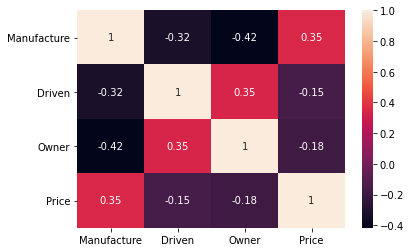

In [60]:
sns.heatmap(data.corr(), annot=True)

In [61]:
# extract company name because brand always matters

data['Name'].unique()

array(['Hyundai Verna', 'KIA SELTOS', 'Renault Kwid',
       'Mercedes Benz C Class', 'Maruti Baleno', 'Maruti Wagon R 1.0',
       'Hyundai i10', 'Jaguar XF', 'Maruti Alto 800', 'Maruti Alto K10',
       'Maruti Swift', 'Jeep Compass', 'Hyundai VENUE', 'MG HECTOR PLUS',
       'Hyundai Elite i20', 'Nissan Micra', 'Honda City', 'Renault Kiger',
       'Maruti Ciaz', 'Skoda Rapid', 'Toyota Fortuner', 'Hyundai i20',
       'Hyundai Grand i10', 'Mercedes Benz E Class',
       'Toyota URBAN CRUISER', 'Datsun Redi Go', 'Maruti Vitara Brezza',
       'Renault Duster', 'Honda CRV', 'MG HECTOR', 'Hyundai Creta',
       'Tata Tiago', 'Toyota Innova', 'Honda Jazz',
       'Mahindra KUV 100 NXT', 'Mahindra Thar', 'Maruti Suzuki Swift ',
       'Renault Duster ', 'Maruti Suzuki Celerio ', 'Ford Figo ',
       'Maruti Suzuki Ertiga ', 'Maruti Suzuki Omni ',
       'Maruti Suzuki 800 ', 'Maruti Suzuki Ciaz ', 'Mahindra Xuv500 ',
       'Mahindra Bolero ', 'Hyundai Elite I20 ', 'Mercedes-Benz E-Class

In [62]:
data['Brand']=data['Name'].str.split(' ').str.slice(0,1).str.join(' ')

In [63]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price,Brand
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699,Hyundai
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299,KIA
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1,DL,279799,Renault
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1,UP,2133299,Mercedes
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2,HR,1429999,KIA


In [64]:
data['Brand'].unique()

array(['Hyundai', 'KIA', 'Renault', 'Mercedes', 'Maruti', 'Jaguar',
       'Jeep', 'MG', 'Nissan', 'Honda', 'Skoda', 'Toyota', 'Datsun',
       'Tata', 'Mahindra', 'Ford', 'Mercedes-Benz', 'Audi', 'San', 'Fiat',
       'Force', 'Chevrolet', 'Mg', 'Porsche', 'Volkswagen', 'Bmw',
       'Hummer', 'Hindustan', 'Volvo', 'Kia'], dtype=object)

In [65]:
data['Brand']=data['Brand'].replace('Kia','KIA')
data['Brand']=data['Brand'].replace('Mg','MG')
data['Brand']=data['Brand'].replace('Mercedes-Benz','Mercedes')

In [66]:
data['Manufacture'].unique()

array([2019, 2020, 2016, 2014, 2018, 2011, 2013, 2009, 2021, 2010, 2015,
       2017, 2002, 2012, 2007, 2008, 2006, 2004, 2003, 2005, 2001, 1998,
       2022, 1990, 2000, 1996])

In [67]:
data['Model'].nunique()

362

In [68]:
# Model have 856 unique categories,

In [69]:
data['Fuel'].unique()

array(['Petrol', 'Diesel', 'PETROL', 'DIESEL', 'ELECTRIC',
       'CNG & HYBRIDS', 'CNG', 'LPG', '--'], dtype=object)

In [70]:
data['Fuel']=data['Fuel'].replace('PETROL','Petrol')
data['Fuel']=data['Fuel'].replace('DIESEL','Diesel')


In [71]:
data['Fuel'].unique()

array(['Petrol', 'Diesel', 'ELECTRIC', 'CNG & HYBRIDS', 'CNG', 'LPG',
       '--'], dtype=object)

In [72]:
data[data['Fuel']=='--']

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price,Brand
343,Nissan Terrano,2015,Others,--,60000.0,MANUAL,1,MH,600000,Nissan


In [73]:
data.loc[data[data['Fuel']=='--'].index,'Fuel'] = 'Diesel'

In [74]:
data['Fuel'].unique()

array(['Petrol', 'Diesel', 'ELECTRIC', 'CNG & HYBRIDS', 'CNG', 'LPG'],
      dtype=object)

In [75]:
data['Driven'].unique()

array([8.06310e+04, 1.29810e+04, 2.23880e+04, 3.68060e+04, 2.17840e+04,
       2.03300e+04, 5.47230e+04, 4.75470e+04, 2.82890e+04, 4.03690e+04,
       4.43190e+04, 2.32770e+04, 3.22510e+04, 4.64000e+04, 2.14900e+04,
       2.77500e+03, 2.25050e+04, 2.26380e+04, 2.88430e+04, 6.34330e+04,
       4.52460e+04, 1.25110e+04, 6.34400e+03, 2.21300e+03, 9.37000e+03,
       1.13990e+04, 4.89150e+04, 5.11050e+04, 9.00860e+04, 6.67820e+04,
       4.24220e+04, 1.32230e+04, 3.45660e+04, 4.28810e+04, 5.45170e+04,
       1.18280e+04, 2.96450e+04, 4.55500e+03, 7.76000e+03, 2.64750e+04,
       6.07740e+04, 2.08300e+04, 5.28700e+03, 6.96200e+03, 7.21200e+03,
       2.57200e+03, 2.99740e+04, 7.39370e+04, 4.53600e+03, 3.06970e+04,
       1.28550e+04, 8.71700e+03, 4.01930e+04, 4.52770e+04, 6.56800e+03,
       1.81910e+04, 8.22950e+04, 2.37330e+04, 9.83500e+03, 3.12000e+03,
       5.10000e+04, 7.42530e+04, 3.62130e+04, 7.00000e+04, 1.35000e+05,
       7.50000e+04, 1.20000e+05, 5.00000e+04, 8.70000e+04, 7.800

In [76]:
data['Automatic'].unique()

array(['Manual', 'Automatic', 'MT', 'MANUAL', 'AUTOMATIC', '--'],
      dtype=object)

In [77]:
data['Automatic'].value_counts()

MANUAL       325
AUTOMATIC    104
Manual        43
Automatic     16
--            11
MT             1
Name: Automatic, dtype: int64

In [78]:
data['Automatic']=data['Automatic'].replace('MANUAL','Manual')
data['Automatic']=data['Automatic'].replace('AUTOMATIC','Automatic')

In [79]:
data['Automatic'].value_counts()

Manual       368
Automatic    120
--            11
MT             1
Name: Automatic, dtype: int64

In [80]:
data[(data['Automatic']!='Automatic') & (data['Automatic']!='Manual')].index

Int64Index([35, 122, 164, 165, 253, 283, 284, 299, 320, 371, 421, 498], dtype='int64')

In [81]:
data.loc[data[(data['Automatic']!='Automatic') & (data['Automatic']!='Manual')].index,'Automatic'] = 'Manual'

In [82]:
data['Automatic'].value_counts()

Manual       380
Automatic    120
Name: Automatic, dtype: int64

In [83]:
data['Owner'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [84]:
data['Location'].unique()

array(['HR', 'DL', 'UP', 'TN', 'MH', 'RJ', 'KR', 'KE', 'CH', 'OD', 'MP',
       'JK', 'AS', 'BI', 'HY', 'GU', 'PJ', 'AP', 'UK', 'WB', 'MA', 'JH',
       'TE', 'Gu', '', 'TI'], dtype=object)

In [85]:
data['Location']=data['Location'].replace('Gu',"GU")
data['Location']=data['Location'].replace('GJ',"GU")

In [86]:
data['Location'].unique()

array(['HR', 'DL', 'UP', 'TN', 'MH', 'RJ', 'KR', 'KE', 'CH', 'OD', 'MP',
       'JK', 'AS', 'BI', 'HY', 'GU', 'PJ', 'AP', 'UK', 'WB', 'MA', 'JH',
       'TE', '', 'TI'], dtype=object)

In [87]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price,Brand
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699,Hyundai
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299,KIA
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1,DL,279799,Renault
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1,UP,2133299,Mercedes
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2,HR,1429999,KIA


In [88]:
# Data Preprocessing has been done

# Lets begin with feature Extraction

In [89]:
# Name feature is not required as we have extracted Brand company from it

# Missing Value

<AxesSubplot:>

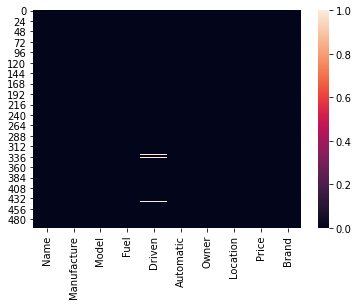

In [90]:
sns.heatmap(data.isnull())

In [91]:
data['Driven'].fillna(data['Driven'].median(), inplace=True)

In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Manufacture,500.0,2013.404,4.676808,1990.0,2011.00,2013.0,2017.0,2022.0
Driven,500.0,73843.828,54174.361613,0.0,40325.00,70000.0,92000.0,707105.0
Owner,500.0,1.620,0.820333,0.0,1.00,1.0,2.0,4.0
Price,500.0,633508.042,963072.455463,20000.0,238124.75,394500.0,679250.0,10900000.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Mahindra'),
  Text(3, 0, 'Honda'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Renault'),
  Text(6, 0, 'Tata'),
  Text(7, 0, 'Ford'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Mercedes'),
  Text(10, 0, 'Chevrolet'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Audi'),
  Text(13, 0, 'Bmw'),
  Text(14, 0, 'Jeep'),
  Text(15, 0, 'MG'),
  Text(16, 0, 'Force'),
  Text(17, 0, 'KIA'),
  Text(18, 0, 'Jaguar'),
  Text(19, 0, 'Skoda'),
  Text(20, 0, 'Datsun'),
  Text(21, 0, 'San'),
  Text(22, 0, 'Porsche'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Fiat'),
  Text(25, 0, 'Hindustan'),
  Text(26, 0, 'Hummer')])

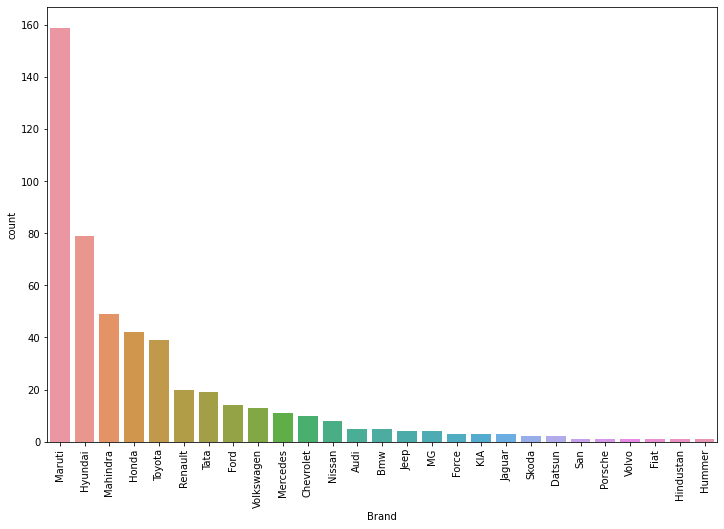

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(data['Brand'], order=data['Brand'].value_counts().index)
plt.xticks(rotation = 90)

In [94]:
data['Brand'].value_counts(normalize=True)

Maruti        0.318
Hyundai       0.158
Mahindra      0.098
Honda         0.084
Toyota        0.078
Renault       0.040
Tata          0.038
Ford          0.028
Volkswagen    0.026
Mercedes      0.022
Chevrolet     0.020
Nissan        0.016
Audi          0.010
Bmw           0.010
Jeep          0.008
MG            0.008
Force         0.006
KIA           0.006
Jaguar        0.006
Skoda         0.004
Datsun        0.004
San           0.002
Porsche       0.002
Volvo         0.002
Fiat          0.002
Hindustan     0.002
Hummer        0.002
Name: Brand, dtype: float64

In [95]:
# Dataset have most values for Maruti, Hyundai and Honda cars

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1996'),
  Text(2, 0, '1998'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016'),
  Text(20, 0, '2017'),
  Text(21, 0, '2018'),
  Text(22, 0, '2019'),
  Text(23, 0, '2020'),
  Text(24, 0, '2021'),
  Text(25, 0, '2022')])

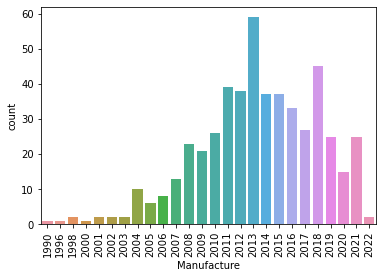

In [96]:
sns.countplot(data['Manufacture'])
plt.xticks(rotation=90)

In [97]:
# Most used cars are available from 2014 to 2021

In [98]:
data.columns

Index(['Name', 'Manufacture', 'Model', 'Fuel', 'Driven', 'Automatic', 'Owner',
       'Location', 'Price', 'Brand'],
      dtype='object')

<AxesSubplot:xlabel='Fuel', ylabel='count'>

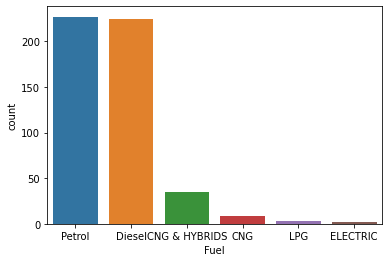

In [99]:
sns.countplot(data['Fuel'], order=data['Fuel'].value_counts().index)

In [100]:
round(data['Fuel'].value_counts(normalize=True)*100,2)

Petrol           45.4
Diesel           44.8
CNG & HYBRIDS     7.0
CNG               1.8
LPG               0.6
ELECTRIC          0.4
Name: Fuel, dtype: float64

71% cars are on Petrol
25.49% cars are on Diesel
others are very few

<AxesSubplot:xlabel='Driven', ylabel='Density'>

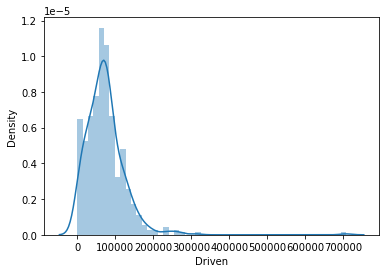

In [101]:
sns.distplot(data['Driven'])

In [102]:
# km driven already by car, data is right skewed, however peak is as normal distribution


<AxesSubplot:xlabel='Automatic', ylabel='count'>

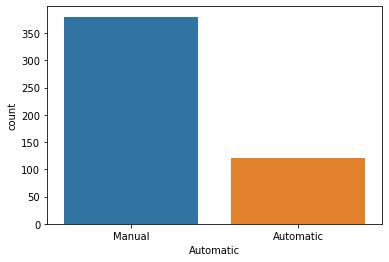

In [103]:
sns.countplot(data['Automatic'])

In [104]:
round(data['Automatic'].value_counts(normalize=True)*100,2)

Manual       76.0
Automatic    24.0
Name: Automatic, dtype: float64

81.32 cars are manual while 18.68% cars are Automatic

In [105]:
data.columns

Index(['Name', 'Manufacture', 'Model', 'Fuel', 'Driven', 'Automatic', 'Owner',
       'Location', 'Price', 'Brand'],
      dtype='object')

<AxesSubplot:xlabel='Owner', ylabel='count'>

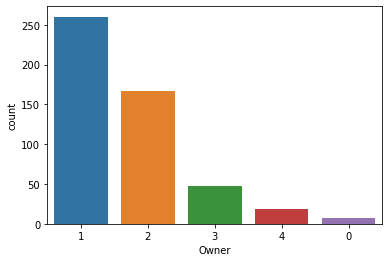

In [106]:
sns.countplot(data['Owner'], order=data['Owner'].value_counts().index)

In [107]:
# means the total owner's of Car

<AxesSubplot:xlabel='Location', ylabel='count'>

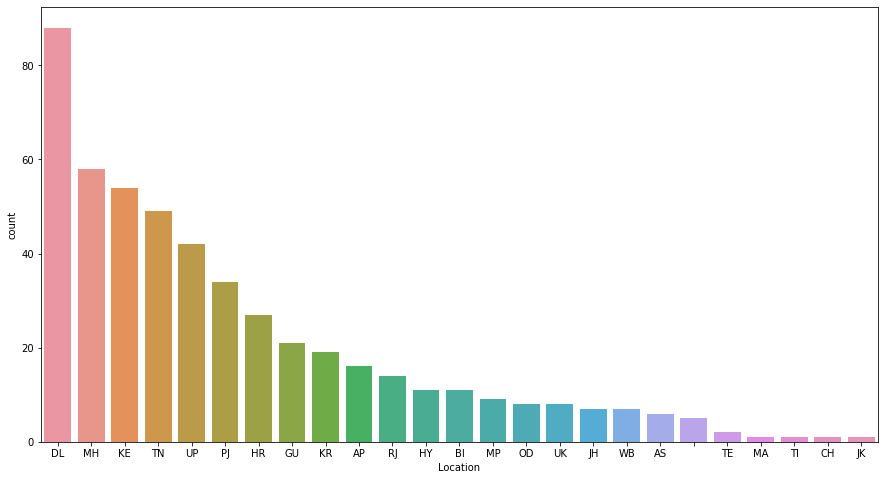

In [108]:
plt.figure(figsize=(15,8))
sns.countplot(data['Location'], order=data['Location'].value_counts().index)

Most of the cras are from Maharastra state, then Delhi state

<AxesSubplot:xlabel='Price', ylabel='Density'>

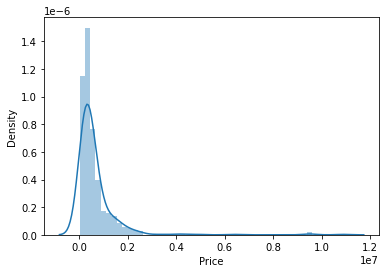

In [109]:
sns.distplot(data['Price'])

Right skewed data

In [110]:
data.head(2)

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price,Brand
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699,Hyundai
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299,KIA


data['Manufacture'] have year of car, so basically we need tha age of car at the time of sell

In [111]:
data['Years']=2022-data['Manufacture']

In [112]:
data.head()

,Name,Manufacture,Model,Fuel,Driven,Automatic,Owner,Location,Price,Brand,Years
0,Hyundai Verna,2019,1.6 SX VTVT (O),Petrol,80631.0,Manual,1,HR,981699,Hyundai,3
1,KIA SELTOS,2020,HTK PLUS 1.5 PETROL,Petrol,12981.0,Manual,2,HR,1155299,KIA,2
2,Renault Kwid,2016,RXT,Petrol,22388.0,Manual,1,DL,279799,Renault,6
3,Mercedes Benz C Class,2014,C 200 AVANTGARDE,Petrol,36806.0,Automatic,1,UP,2133299,Mercedes,8
4,KIA SELTOS,2020,HTX AT PETROL,Petrol,21784.0,Automatic,2,HR,1429999,KIA,2


In [113]:
data.drop(['Name','Model','Manufacture'], axis=1, inplace=True)

<AxesSubplot:xlabel='Years', ylabel='Price'>

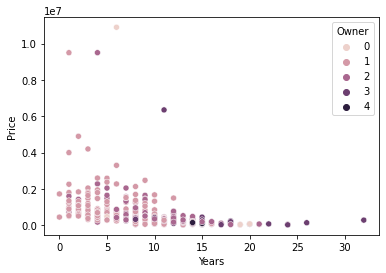

In [114]:
sns.scatterplot(data['Years'], data['Price'], hue=data['Owner'])

More years old car possible many owners has been changed so Price is less

<AxesSubplot:xlabel='Years', ylabel='Price'>

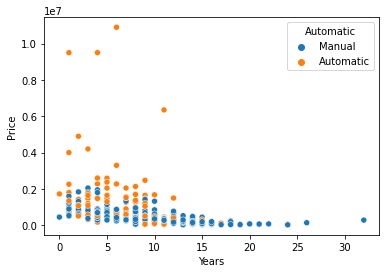

In [115]:
sns.scatterplot(data['Years'], data['Price'], hue=data['Automatic'])

In [117]:
#Many years back, Automation was not in trends, so we hardly see automation in old cars

<AxesSubplot:xlabel='Years', ylabel='Price'>

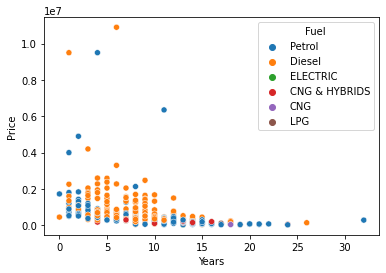

In [118]:
sns.scatterplot(data['Years'], data['Price'], hue=data['Fuel'])

<AxesSubplot:xlabel='Years', ylabel='Price'>

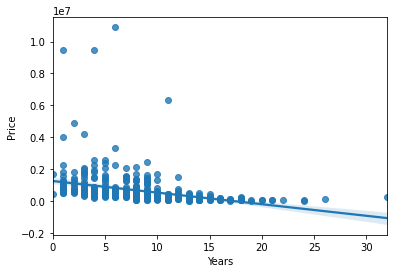

In [119]:
sns.regplot(data['Years'],data['Price'])

<AxesSubplot:xlabel='Driven', ylabel='Price'>

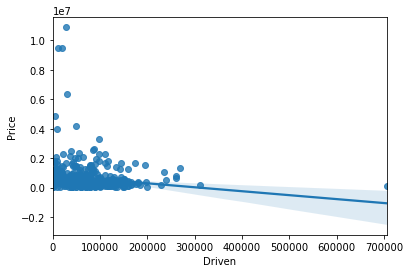

In [120]:
sns.regplot(data['Driven'],data['Price'])

In [121]:
data.head(3)

,Fuel,Driven,Automatic,Owner,Location,Price,Brand,Years
0,Petrol,80631.0,Manual,1,HR,981699,Hyundai,3
1,Petrol,12981.0,Manual,2,HR,1155299,KIA,2
2,Petrol,22388.0,Manual,1,DL,279799,Renault,6


In [122]:
X= data.drop('Price', axis=1)
Y=data['Price']

In [123]:
X.shape , Y.shape

((500, 7), (500,))

In [124]:
X.head()

,Fuel,Driven,Automatic,Owner,Location,Brand,Years
0,Petrol,80631.0,Manual,1,HR,Hyundai,3
1,Petrol,12981.0,Manual,2,HR,KIA,2
2,Petrol,22388.0,Manual,1,DL,Renault,6
3,Petrol,36806.0,Automatic,1,UP,Mercedes,8
4,Petrol,21784.0,Automatic,2,HR,KIA,2


# Outlier

<AxesSubplot:xlabel='Driven'>

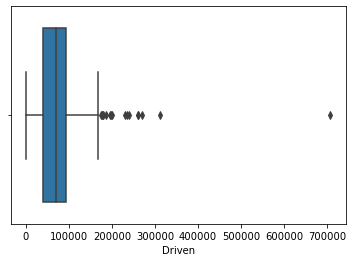

In [125]:
sns.boxplot(data['Driven'])

In [126]:
IQR= X['Driven'].quantile(.75)- X['Driven'].quantile(.25)
IQR

51675.0

In [127]:
upper= X['Driven'].quantile(.75) +(1.5 * IQR)
upper

169512.5

In [128]:
X['Driven']=np.where(X['Driven']>upper,upper,X['Driven'])

<AxesSubplot:xlabel='Driven'>

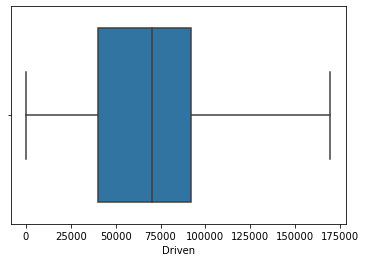

In [129]:
sns.boxplot(X['Driven'])

In [130]:
X['Driven'].shape

(500,)

In [131]:
[X['Driven']]

[0       80631.0
 1       12981.0
 2       22388.0
 3       36806.0
 4       21784.0
          ...   
 495     90800.0
 496     62500.0
 497    135280.0
 498     67000.0
 499     40000.0
 Name: Driven, Length: 500, dtype: float64]

# Encoding

In [132]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'>

In [133]:
X.head()

,Fuel,Driven,Automatic,Owner,Location,Brand,Years
0,Petrol,80631.0,Manual,1,HR,Hyundai,3
1,Petrol,12981.0,Manual,2,HR,KIA,2
2,Petrol,22388.0,Manual,1,DL,Renault,6
3,Petrol,36806.0,Automatic,1,UP,Mercedes,8
4,Petrol,21784.0,Automatic,2,HR,KIA,2


In [134]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
k=sc.fit_transform([X['Driven']])

In [139]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [140]:
from sklearn.compose import ColumnTransformer
transformer= ColumnTransformer(transformers=[('tnf1',StandardScaler(),['Driven','Years']),('tnf2',OneHotEncoder(sparse=False,drop='first'),['Fuel','Automatic','Location','Brand'])],remainder='passthrough')

In [141]:
x=pd.DataFrame(transformer.fit_transform(X))

In [142]:
x.shape  , Y.shape

((500, 59), (500,))

# Machine Learning

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [144]:
LR= LinearRegression()

In [145]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6948930006003453 on Random State = 48


In [146]:
x_train,x_test,y_train,y_test= train_test_split(x,Y,random_state=93,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [149]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('Root mean_square_error of',m,'model' , np.sqrt(mean_squared_error(y_test,m.predict(x_test))))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.838123139356261e+16
Root mean_square_error of LinearRegression() model 3.285050906929811e+17
R2 Score of LinearRegression() model -5.314047302779004e+24
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 367370.4250535556
Root mean_square_error of Ridge() model 1197811.6310861707
R2 Score of Ridge() model 29.34900871366205
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 351462.80694200523
Root mean_square_error of Lasso() model 1169072.1729578339
R2 Score of Lasso() model 32.69863781674117
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 428812.2
Root mean_square_error of DecisionTreeRegressor() model 1241747.950683353
R2 Score of DecisionTreeRegressor() model 24.070924539368843
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 491828.14928328345
Root mea

# Cross Validation

In [151]:
from sklearn.model_selection import cross_val_score

In [152]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,x,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 3.285050906929811e+17
cross Validation score of root mean square  LinearRegression()  is  6.377216369134784e+17
**************************************************
Root mean_square of  Ridge() model 1197811.6310861707
cross Validation score of root mean square  Ridge()  is  745441.4680013345
**************************************************
Root mean_square of  Lasso() model 1169072.1729578339
cross Validation score of root mean square  Lasso()  is  741641.9740828719
**************************************************
Root mean_square of  DecisionTreeRegressor() model 1241747.950683353
cross Validation score of root mean square  DecisionTreeRegressor()  is  866859.5430843177
**************************************************
Root mean_square of  SVR() model 1458645.5978054581
cross Validation score of root mean square  SVR()  is  991729.2119933253
**************************************************
Root mean_square of  KNeighborsRegressor() m

# Random Forest Regressor

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [154]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [155]:
rf=RandomForestRegressor()

In [156]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [157]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [158]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [159]:
rf_random.best_score_


-264071177428.78085

In [160]:
from sklearn import metrics
predictions=rf_random.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 381011.70552312414
MSE: 1608606099678.935
RMSE: 1268308.3614322406


Text(0, 0.5, 'Prediction--->')

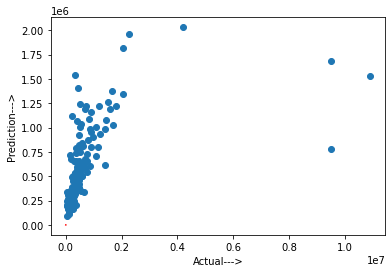

In [161]:
plt.scatter(y_test,predictions)
x=[0,25]
Y=[0,25]
plt.plot(x,Y,color="r")
plt.xlabel("Actual--->")
plt.ylabel("Prediction--->")

# Saving Model

In [162]:
import joblib
joblib.dump(rf_random.best_estimator_,"car_price_prediction.pkl")

['car_price_prediction.pkl']

# Dataset  used

In [163]:
file='car_data.csv'
data.to_csv(file)